In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

palette = sns.color_palette("Spectral")

## Read data into a data frame get basic overview of the data

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
def basic_info(df=df):
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    print()
    print('The names and data types of each col:')
    for i in df.columns:
        print(f'Column name: {i}. Data Type: {type(i)}')
    print()
    print(f'The number of duplicate rows are: {df.duplicated().sum()}')
    
basic_info()

Number of rows: 1599
Number of columns: 12

The names and data types of each col:
Column name: fixed acidity. Data Type: <class 'str'>
Column name: volatile acidity. Data Type: <class 'str'>
Column name: citric acid. Data Type: <class 'str'>
Column name: residual sugar. Data Type: <class 'str'>
Column name: chlorides. Data Type: <class 'str'>
Column name: free sulfur dioxide. Data Type: <class 'str'>
Column name: total sulfur dioxide. Data Type: <class 'str'>
Column name: density. Data Type: <class 'str'>
Column name: pH. Data Type: <class 'str'>
Column name: sulphates. Data Type: <class 'str'>
Column name: alcohol. Data Type: <class 'str'>
Column name: quality. Data Type: <class 'str'>

The number of duplicate rows are: 240


In [7]:
df.drop_duplicates(inplace=True)

# Plot the distibution of each col

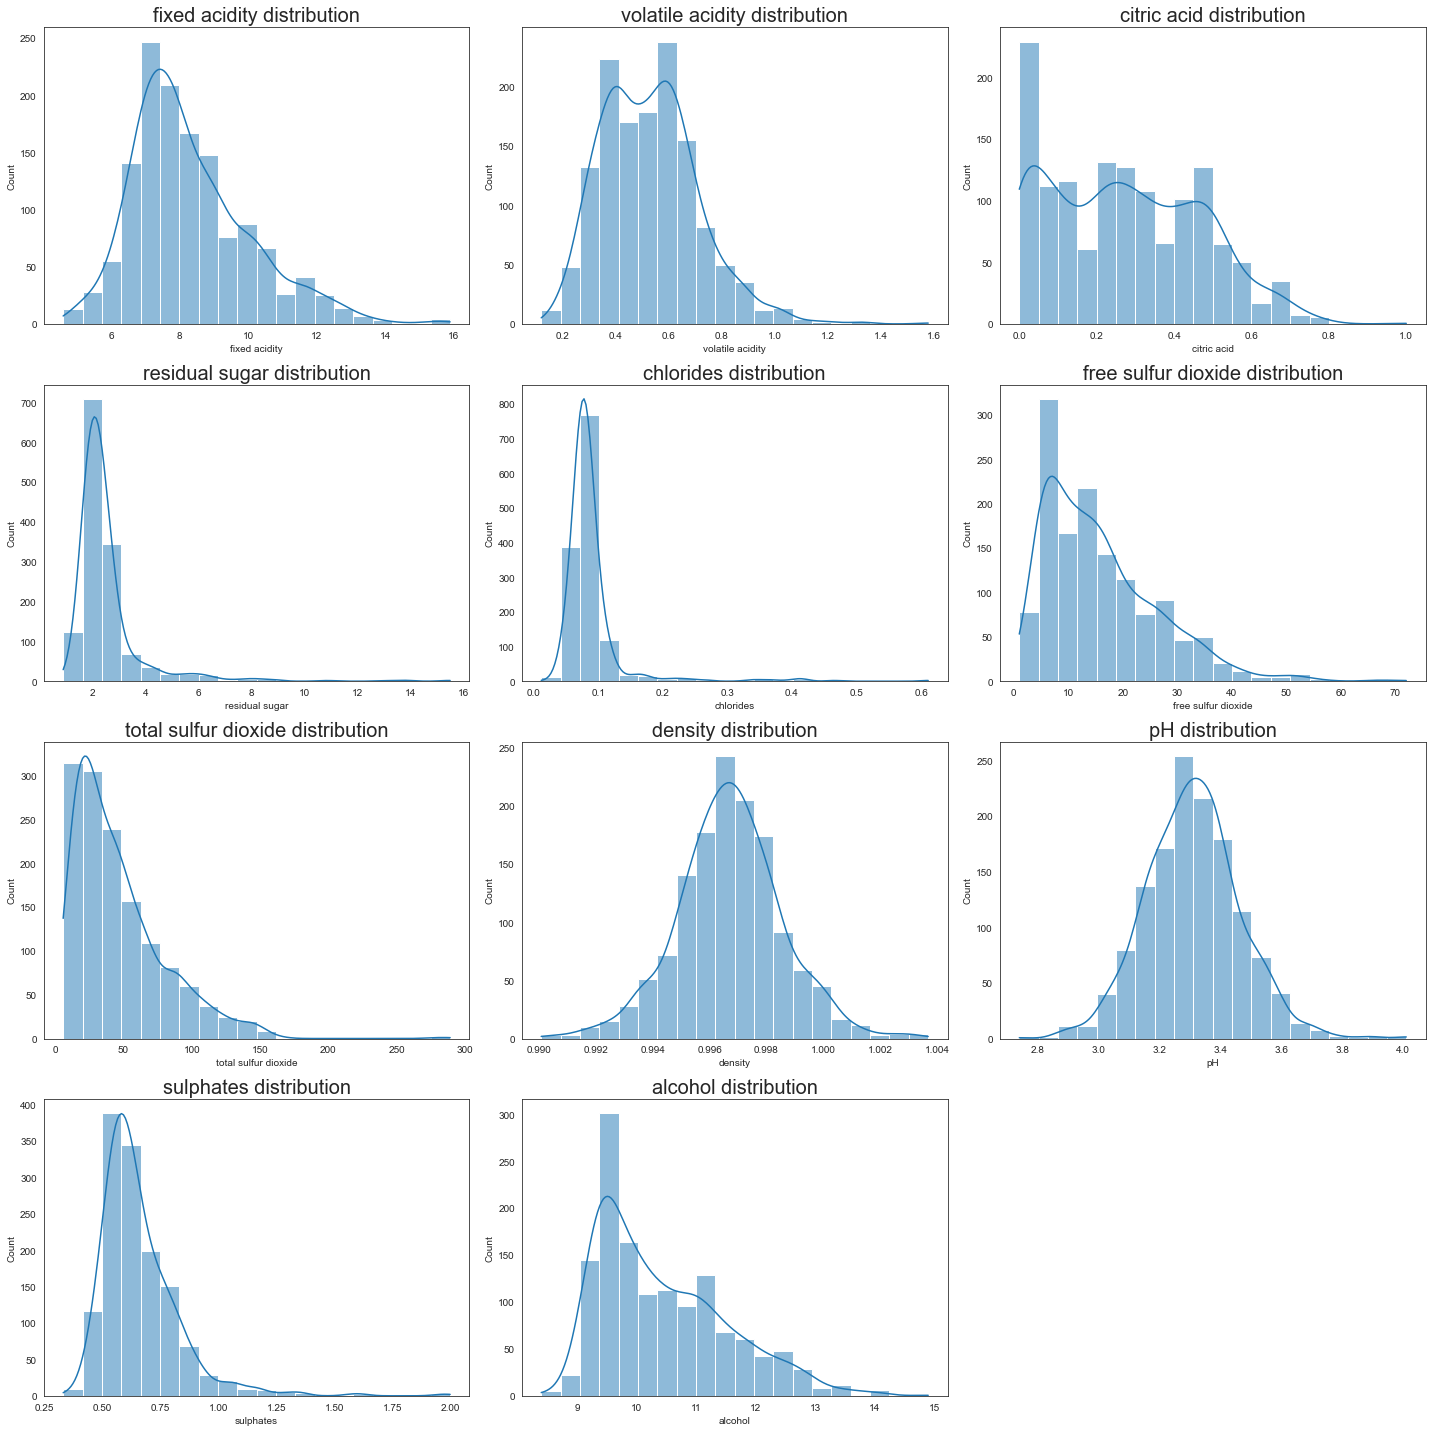

In [8]:
cols = [i for i in df.columns if i != 'quality']

#histgram
sns.set_style("white")
plt.figure(figsize=(20, 20))

i=1 
for col in cols:
    
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=20, multiple="stack", alpha=.5 ,palette=palette)  
    plt.title(col+" distribution" ,fontsize=20)
    i=i+1 
    
plt.tight_layout()

## Univariate Analysis 

### In less pretencious language "making box plots"


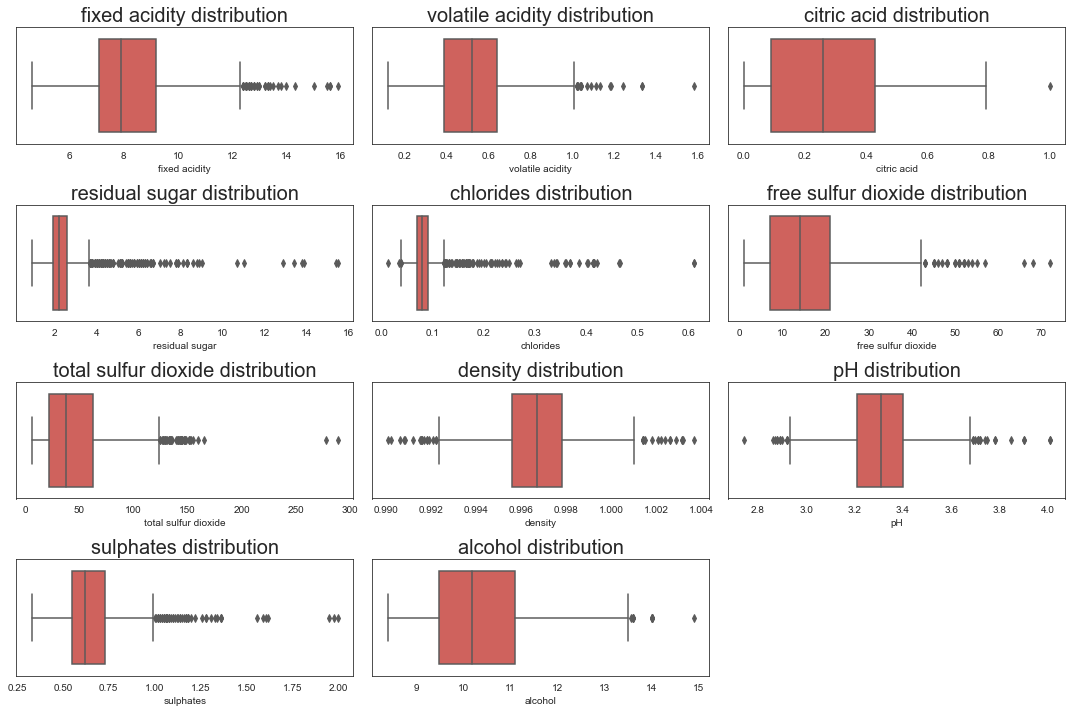

In [9]:
sns.set_style('white')
plt.figure(figsize=(15,10))
i = 1

for col in cols:
    plt.subplot(4, 3, i)
    sns.boxplot(data=df,x=col,palette=palette)
    plt.title(col + " distribution", fontsize=20)
    i+=1

plt.tight_layout()

# REPLACE OUTLIERS

In [10]:
def outliers(df=df):
    cols = list(df.columns)[:-1]
    for col in cols:
        q1,q3 = df[col].quantile([.25, .75])
        iqr = q3-q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)
        df.loc[(df[col] < lower) | (df[col] > upper), col] = np.nan
        df[col].fillna(df[col].median(), inplace=True)

In [11]:
outliers()

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='chlorides', ylabel='Count'>

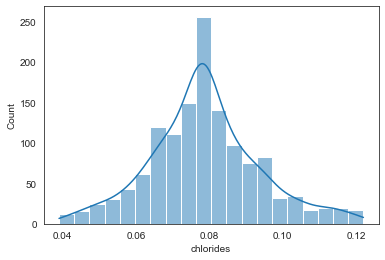

In [13]:
sns.histplot(data=df, x='chlorides', kde=True, bins=20, multiple="stack", alpha=.5 ,palette=palette)  

<AxesSubplot:xlabel='chlorides'>

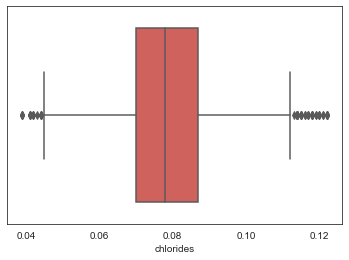

In [14]:
sns.boxplot(data=df, x='chlorides', palette=palette)


# Forgot to take out quality but thankfully it's skewness was below threshold so it wasn't altered but should have been more careful

In [15]:
from scipy.stats import skew

skew_dic = {i: skew(df[i]) for i in df.columns}
#for i in df.columns:
    #skewness = skew(df[i])
    #print(f"The skewness of {i} is: {skewness}")
    
skew_dic

{'fixed acidity': 0.5823167676246038,
 'volatile acidity': 0.3242029369510077,
 'citric acid': 0.28706997206094614,
 'residual sugar': 0.6522271977973111,
 'chlorides': 0.2425668371427521,
 'free sulfur dioxide': 0.7950782640262765,
 'total sulfur dioxide': 0.9474546575127887,
 'density': 0.02105874215096232,
 'pH': 0.04194930458016962,
 'sulphates': 0.6423317738341326,
 'alcohol': 0.7412232286866387,
 'quality': 0.19219415286935035}

In [16]:


#boxcox_transformed_data, _ = stats.boxcox(data)

for i in skew_dic:
    if abs(skew_dic[i]) >= 0.5:
        transformed_data, _ = stats.boxcox(df[i])
        df[i] = transformed_data

In [17]:
skew_dic = {i: skew(df[i]) for i in df.columns}
skew_dic

{'fixed acidity': 0.001420566367906855,
 'volatile acidity': 0.3242029369510077,
 'citric acid': 0.28706997206094614,
 'residual sugar': 0.0002781756337866834,
 'chlorides': 0.2425668371427521,
 'free sulfur dioxide': -0.03744215356275262,
 'total sulfur dioxide': -0.023634594010345525,
 'density': 0.02105874215096232,
 'pH': 0.04194930458016962,
 'sulphates': 0.003705137049342647,
 'alcohol': 0.10751648315200987,
 'quality': 0.19219415286935035}

<AxesSubplot:>

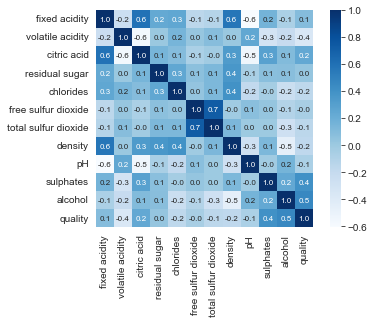

In [18]:
#sns.heatmap(df.corr())

sns.heatmap(df.corr(), cbar=True, square=True, fmt = '.1f',
            annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [19]:
corr_matrix = df.corr()
corr_matrix = corr_matrix.mask(np.eye(len(corr_matrix), dtype=bool))
mask = np.abs(corr_matrix) >= .5
indices = np.where(mask)
corr_pairs = pd.DataFrame({'Variable 1': indices[0]})




In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [22]:
len(df)

1359

# We don't have a plethora of training data so we probably want to oversample from undersampled qualities

# MINORITY QUALTIES:
    3
    8
    4
    7? -> signifianlty more than 3 8 and 4

# Will create one data set that attempts to more closley balance the data and then we will create another data set that works on the existing data although it's so inbalanced I don't think it will work

In [23]:
data = df.drop('quality', axis=1)

In [40]:
from imblearn.over_sampling import SMOTE as smote
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(data.values, df['quality'].values, test_size=0.2, random_state=42)


#X_resampled, y_resampled = smote.fit_resample(X, y)


In [41]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# MOST BASIC RANDOM FOREST
## RUNNING ON BOTH OVERSAMPLED DATA and regular data

In [57]:
from sklearn.ensemble import RandomForestClassifier

RF_classifer_over = RandomForestClassifier()
RF_classifer_reg = RandomForestClassifier()

RF_classifer_over.fit(X_resampled,y_resampled)
RF_classifer_reg.fit(X_train,y_train)

preds_over = RF_classifer_reg.predict(X_test)
preds_reg = RF_classifer_reg.predict(X_test)

accuracy_reg = accuracy_score(y_test,preds_reg)
accuracy_over = accuracy_score(y_test,preds_over)

#print(f"Accuracy for data without oversampaling: {accuracy_reg}")
#print(f"Accuracy for data with oversampaling: {accuracy_over}")


# CROSS VALIDATION

In [45]:
#our hyperparameter grid
params = {
    "n_estimators":range(25,100,25),
    "max_depth":range(10,50,10)  
}
model = GridSearchCV(
    RF_classifer_over,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [46]:
model.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [49]:
model.best_params_

{'max_depth': 20, 'n_estimators': 75}

In [50]:
new_model = RandomForestClassifier(**model.best_params_)

In [52]:
new_model.fit(X_resampled,y_resampled)

RandomForestClassifier(max_depth=20, n_estimators=75)

In [53]:
predictions = new_model.predict(X_test)